In [1]:
#!pip install dejavu-sans-ttf

In [ ]:
import random
from itertools import chain
import matplotlib.pyplot as plt
import numpy as np

class Individual:
    def __init__(self, genes=None):
        #Initialize individual with random permutation (column placements)
        self.genes = genes if genes else random.sample(range(1, 17), 16)
        self.fitness = 0.0

    def calculate_fitness(self):
        # Calculate fitness based on diagonal conflicts
        conflicts = 0
        for i in range(16):
            for j in range(i+1, 16):
                if abs(i-j) == abs(self.genes[i]-self.genes[j]):
                    conflicts += 1
        self.fitness = 1.0 / (1.0 + conflicts)

        

    def __repr__(self):
        return f"Fitness: {self.fitness:.4f} | Genes: {self.genes}"

In [3]:
class GeneticAlgorithm:
    def __init__(self, population_size=100, mutation_rate=0.1): #default var.
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.population = []

    def initialize_population(self):
        # Create initial population
        print("\n" + "="*60)
        print(f"INITIAL POPULATION CREATION ({self.population_size} individuals)")
        self.population = [Individual() for _ in range(self.population_size)]
        
    def _select_parents(self):
        # Tournament selection for parents (pick 3, choose top 2)
        print("\n" + "-"*40)
        print("PARENT SELECTION:")
        participants = random.sample(self.population, 3)
        print("Tournament participants:")
        for p in participants:
            print(f"- {p}")
        
        parents = sorted(participants, key=lambda x: -x.fitness)[:2]
        print("\nSelected parents:")
        print(f"Parent 1: {parents[0]}")
        print(f"Parent 2: {parents[1]}")
        return parents
        
    def _crossover(self, parent1, parent2):
        # Replace two-point crossover with ordered crossover (OX) to preserve permutation validity
        print("\nCROSSOVER OPERATION:")
        point1, point2 = sorted(random.sample(range(16), 2))
        print(f"Crossover points: {point1} and {point2}")
        
        segment = parent1.genes[point1:point2+1]
        remaining = [gene for gene in parent2.genes if gene not in segment]
        child_genes = remaining[:point1] + segment + remaining[point1:]

        print("Final child genes:", child_genes)
        return Individual(child_genes)
    
    def _mutate(self, individual):
        # Swap mutation with adaptive rate
        if random.random() < self.mutation_rate:
            idx1, idx2 = random.sample(range(16), 2)
            print("\nMUTATION OPERATION:")
            print(f"Original genes: {individual.genes}")
            print(f"Swapping positions {idx1} and {idx2}")
            individual.genes[idx1], individual.genes[idx2] = \
                individual.genes[idx2], individual.genes[idx1]
            print(f"Mutated genes: {individual.genes}")
        return individual
    
    def visualize_solution(self, genes):
        board_size = 16
        _, ax = plt.subplots(figsize=(10, 10))
        ax.set_xticks(np.arange(board_size))
        ax.set_yticks(np.arange(board_size))
        ax.set_xticklabels(range(1, 17))
        ax.set_yticklabels(range(1, 17))
        ax.set_title("16-Queens Solution")

        # Create chessboard pattern
        board = np.zeros((board_size, board_size))
        board[1::2, ::2] = 1
        board[::2, 1::2] = 1
        
        ax.imshow(board, cmap='binary', origin='lower')

        # Plot queens with compatible font
        for row, col in enumerate(genes):
            ax.text(col-1, row, '♛', fontsize=12, ha='center', va='center', 
                color='red', fontfamily='DejaVu Sans')

        plt.show()
    
    def evolve(self):
        print("\n" + "="*60)
        print("EVOLUTION CYCLE START")

        # Evolve population (crossover + mutation + elitism)
        new_pop = []
        # Elitism: Keep top 5%
        elite_size = int(0.05 * self.population_size)
        self.population.sort(key=lambda x: -x.fitness)
        new_pop.extend(self.population[:elite_size])
        
        # Generate offspring with adaptive mutation
        while len(new_pop) < self.population_size:
            parent1, parent2 = self._select_parents()
            child = self._crossover(parent1, parent2)
            child = self._mutate(child)  # Mutation applied to child
            new_pop.append(child)
        
        self.population = new_pop[:self.population_size]
        print("\nEVOLUTION CYCLE COMPLETE")
        print(f"Population size: {len(self.population)}")

    def run(self, max_generations=1000):
        self.initialize_population()
        for gen in range(max_generations):
            for ind in self.population:
                ind.calculate_fitness()
            
            best = max(self.population, key=lambda x: x.fitness)
            if best.fitness == 1.0:
                print("\nSOLUTION FOUND!")
                print("Final arrangement:", best.genes)
                self.visualize_solution(best.genes)
                return
            self.evolve()
        print("No solution found")


INITIAL POPULATION CREATION (300 individuals)

EVOLUTION CYCLE START

----------------------------------------
PARENT SELECTION:
Tournament participants:
- Fitness: 0.0909 | Genes: [8, 3, 14, 2, 9, 13, 1, 7, 15, 12, 10, 11, 6, 16, 4, 5]
- Fitness: 0.0769 | Genes: [8, 16, 12, 15, 14, 3, 6, 1, 5, 7, 11, 10, 4, 9, 2, 13]
- Fitness: 0.1111 | Genes: [2, 13, 7, 10, 16, 1, 4, 11, 6, 9, 12, 14, 8, 3, 5, 15]

Selected parents:
Parent 1: Fitness: 0.1111 | Genes: [2, 13, 7, 10, 16, 1, 4, 11, 6, 9, 12, 14, 8, 3, 5, 15]
Parent 2: Fitness: 0.0909 | Genes: [8, 3, 14, 2, 9, 13, 1, 7, 15, 12, 10, 11, 6, 16, 4, 5]

CROSSOVER OPERATION:
Crossover points: 0 and 11
Final child genes: [2, 13, 7, 10, 16, 1, 4, 11, 6, 9, 12, 14, 8, 3, 15, 5]

----------------------------------------
PARENT SELECTION:
Tournament participants:
- Fitness: 0.1111 | Genes: [16, 14, 13, 9, 4, 1, 6, 5, 11, 2, 12, 10, 3, 7, 15, 8]
- Fitness: 0.1250 | Genes: [16, 15, 13, 2, 10, 7, 3, 1, 4, 8, 11, 9, 14, 5, 6, 12]
- Fitness: 0.1000 | 

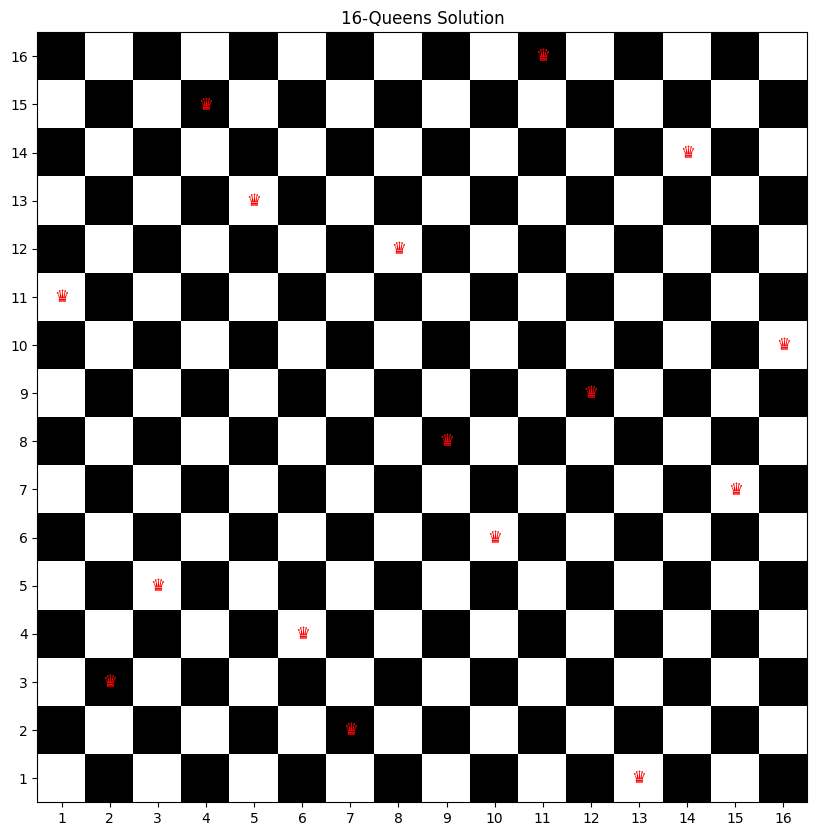

In [4]:
# if __name__ == "__main__":
ga = GeneticAlgorithm(population_size=300, mutation_rate=0.15) # mutation_rate ~ 15% mutation chance
ga.run(max_generations=2000)